In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\risha\Documents\KRMU\AIML_assigment\datasets\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [5]:
df.shape

(53392, 33)

In [6]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
df.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [8]:
df=df.drop(['Data_Value', 'Income','Data_Value_Unit','Data_Value_Footnote_Symbol','Total','Data_Value_Footnote'], axis=1)

In [9]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Age(years)', 'Education', 'Gender', 'Race/Ethnicity', 'GeoLocation',
       'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [10]:
df.Data_Value_Type.value_counts()


Data_Value_Type
Value    53392
Name: count, dtype: int64

In [11]:
df=df.drop(['Data_Value_Type','Topic', 'Question'], axis=1)

In [12]:
df.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Data_Value_Alt                5046
Low_Confidence_Limit          5046
High_Confidence_Limit         5046
Sample_Size                   5046
Age(years)                   41954
Education                    45764
Gender                       49578
Race/Ethnicity               38136
GeoLocation                   1008
ClassID                          0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
dtype: int64

In [13]:
df.Gender.value_counts()

Gender
Male      1907
Female    1907
Name: count, dtype: int64

In [14]:
df['Race/Ethnicity'].value_counts()

Race/Ethnicity
Non-Hispanic White               1907
Non-Hispanic Black               1907
Hispanic                         1907
Asian                            1907
Hawaiian/Pacific Islander        1907
American Indian/Alaska Native    1907
2 or more races                  1907
Other                            1907
Name: count, dtype: int64

In [15]:
pd.unique(df.YearStart)


array([2011, 2012, 2014, 2013, 2015, 2016], dtype=int64)

In [16]:
pd.unique(df.YearEnd)


array([2011, 2012, 2014, 2013, 2015, 2016], dtype=int64)

In [17]:
df[['YearStart','YearEnd']]

,YearStart,YearEnd
0,2011,2011
1,2011,2011
2,2011,2011
3,2011,2011
4,2011,2011
...,...,...
53387,2016,2016
53388,2016,2016
53389,2016,2016
53390,2016,2016


In [18]:
df=df.dropna(subset=['Education'])


In [19]:
print(df.duplicated().sum())

0


In [20]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [21]:
remove_outliers(df)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,33.6,29.9,37.6,1153.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,32.8,30.2,35.6,2402.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
5,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,33.8,31.0,36.8,1925.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Some college or technical school,EDU,EDUCOTEC
6,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,26.4,23.7,29.3,1812.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,College graduate,EDU,EDUCOGRAD
31,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,33.2,29.2,37.5,1153.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Education,Less than high school,EDU,EDUHS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53343,2016,2016,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,33.9,31.1,36.8,1735.0,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Education,College graduate,EDU,EDUCOGRAD
53367,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,29.2,21.2,38.6,238.0,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Education,Less than high school,EDU,EDUHS
53368,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,26.9,21.1,33.5,394.0,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Education,High school graduate,EDU,EDUHSGRAD
53369,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,31.2,22.2,41.8,230.0,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Education,Some college or technical school,EDU,EDUCOTEC


In [22]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [23]:
standardize_text(df)

In [24]:
df.isna().sum()


YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Class                           0
Data_Value_Alt                  0
Low_Confidence_Limit            0
High_Confidence_Limit           0
Sample_Size                     0
Age(years)                   6940
Education                       0
Gender                       6940
Race/Ethnicity               6940
GeoLocation                     0
ClassID                         0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
LocationID                      0
StratificationCategory1         0
Stratification1                 0
StratificationCategoryId1       0
StratificationID1               0
dtype: int64

In [25]:
df['Data_Value_Alt']= df['Data_Value_Alt'].fillna(df['Data_Value_Alt'].mean())

In [26]:
df['Low_Confidence_Limit']=df['Low_Confidence_Limit'].fillna(df['Low_Confidence_Limit'].median())

In [27]:
df['High_Confidence_Limit']=df['High_Confidence_Limit'].fillna(df['High_Confidence_Limit'].median())

In [28]:
df['Sample_Size']=df['Sample_Size'].fillna(df['Sample_Size'].median())

In [29]:
num_col= df.select_dtypes(include=['int','float']).columns
num= df[num_col]

In [30]:
num

,YearStart,YearEnd,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
3,2011,2011,33.6,29.9,37.6,1153.0,1
4,2011,2011,32.8,30.2,35.6,2402.0,1
5,2011,2011,33.8,31.0,36.8,1925.0,1
6,2011,2011,26.4,23.7,29.3,1812.0,1
31,2011,2011,33.2,29.2,37.5,1153.0,1
...,...,...,...,...,...,...,...
53343,2016,2016,33.9,31.1,36.8,1735.0,72
53367,2016,2016,29.2,21.2,38.6,238.0,78
53368,2016,2016,26.9,21.1,33.5,394.0,78
53369,2016,2016,31.2,22.2,41.8,230.0,78


In [31]:
num.isna().sum()

YearStart                0
YearEnd                  0
Data_Value_Alt           0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
LocationID               0
dtype: int64

In [32]:
cat_col= df.select_dtypes(include=['object']).columns
cat= df[cat_col]

In [33]:
cat.columns

Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Age(years)',
       'Education', 'Gender', 'Race/Ethnicity', 'GeoLocation', 'ClassID',
       'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [34]:
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['Education'] = df['Education'].map(ed_map)

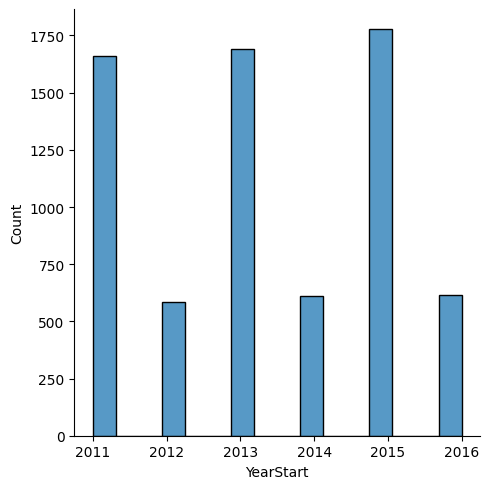

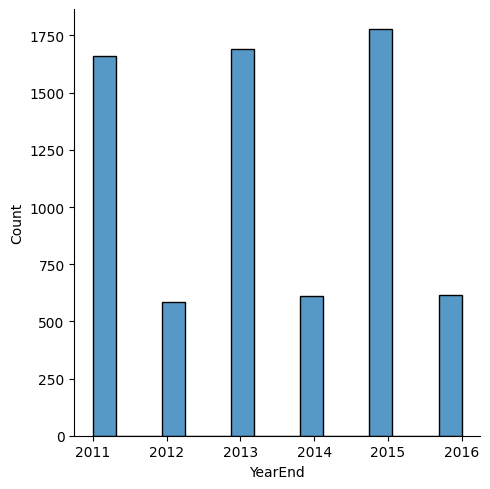

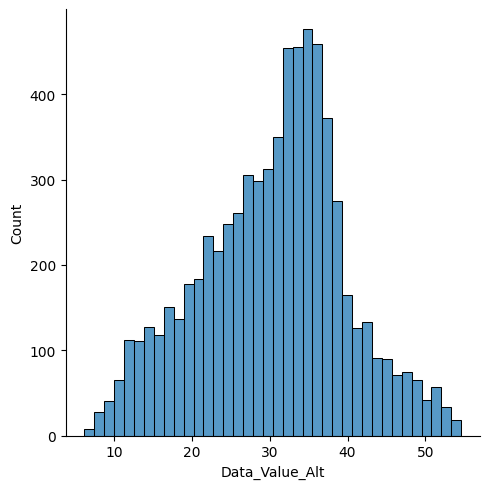

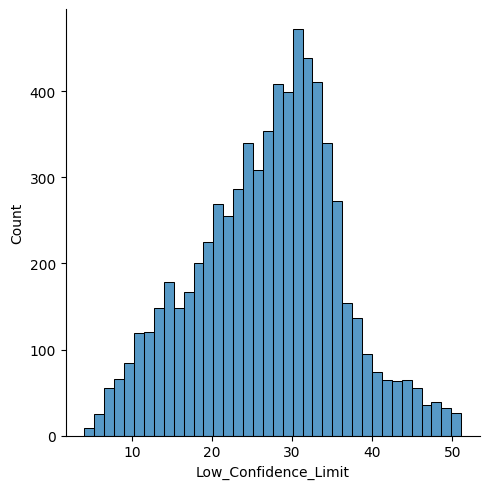

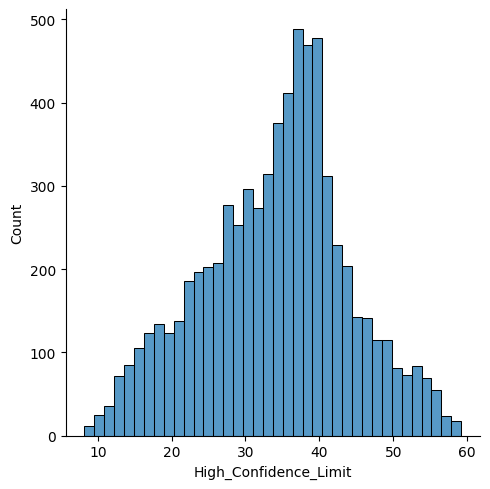

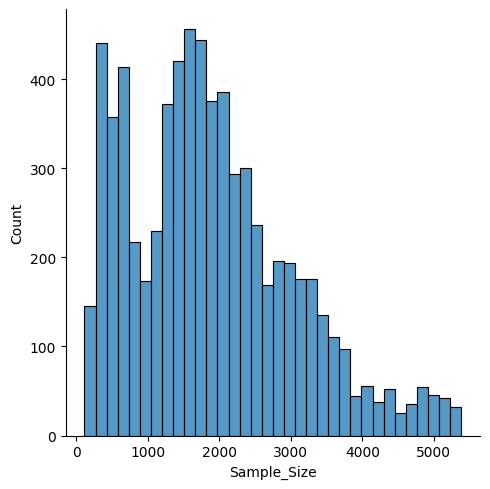

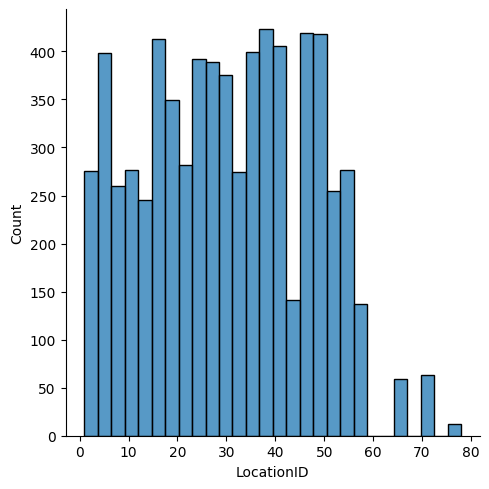

In [35]:
for col in num.columns:
    sns.displot(num[col])
    plt.show()

In [36]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6940 entries, 3 to 53370
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              6940 non-null   int64  
 1   YearEnd                6940 non-null   int64  
 2   Data_Value_Alt         6940 non-null   float64
 3   Low_Confidence_Limit   6940 non-null   float64
 4   High_Confidence_Limit  6940 non-null   float64
 5   Sample_Size            6940 non-null   float64
 6   LocationID             6940 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 433.8 KB


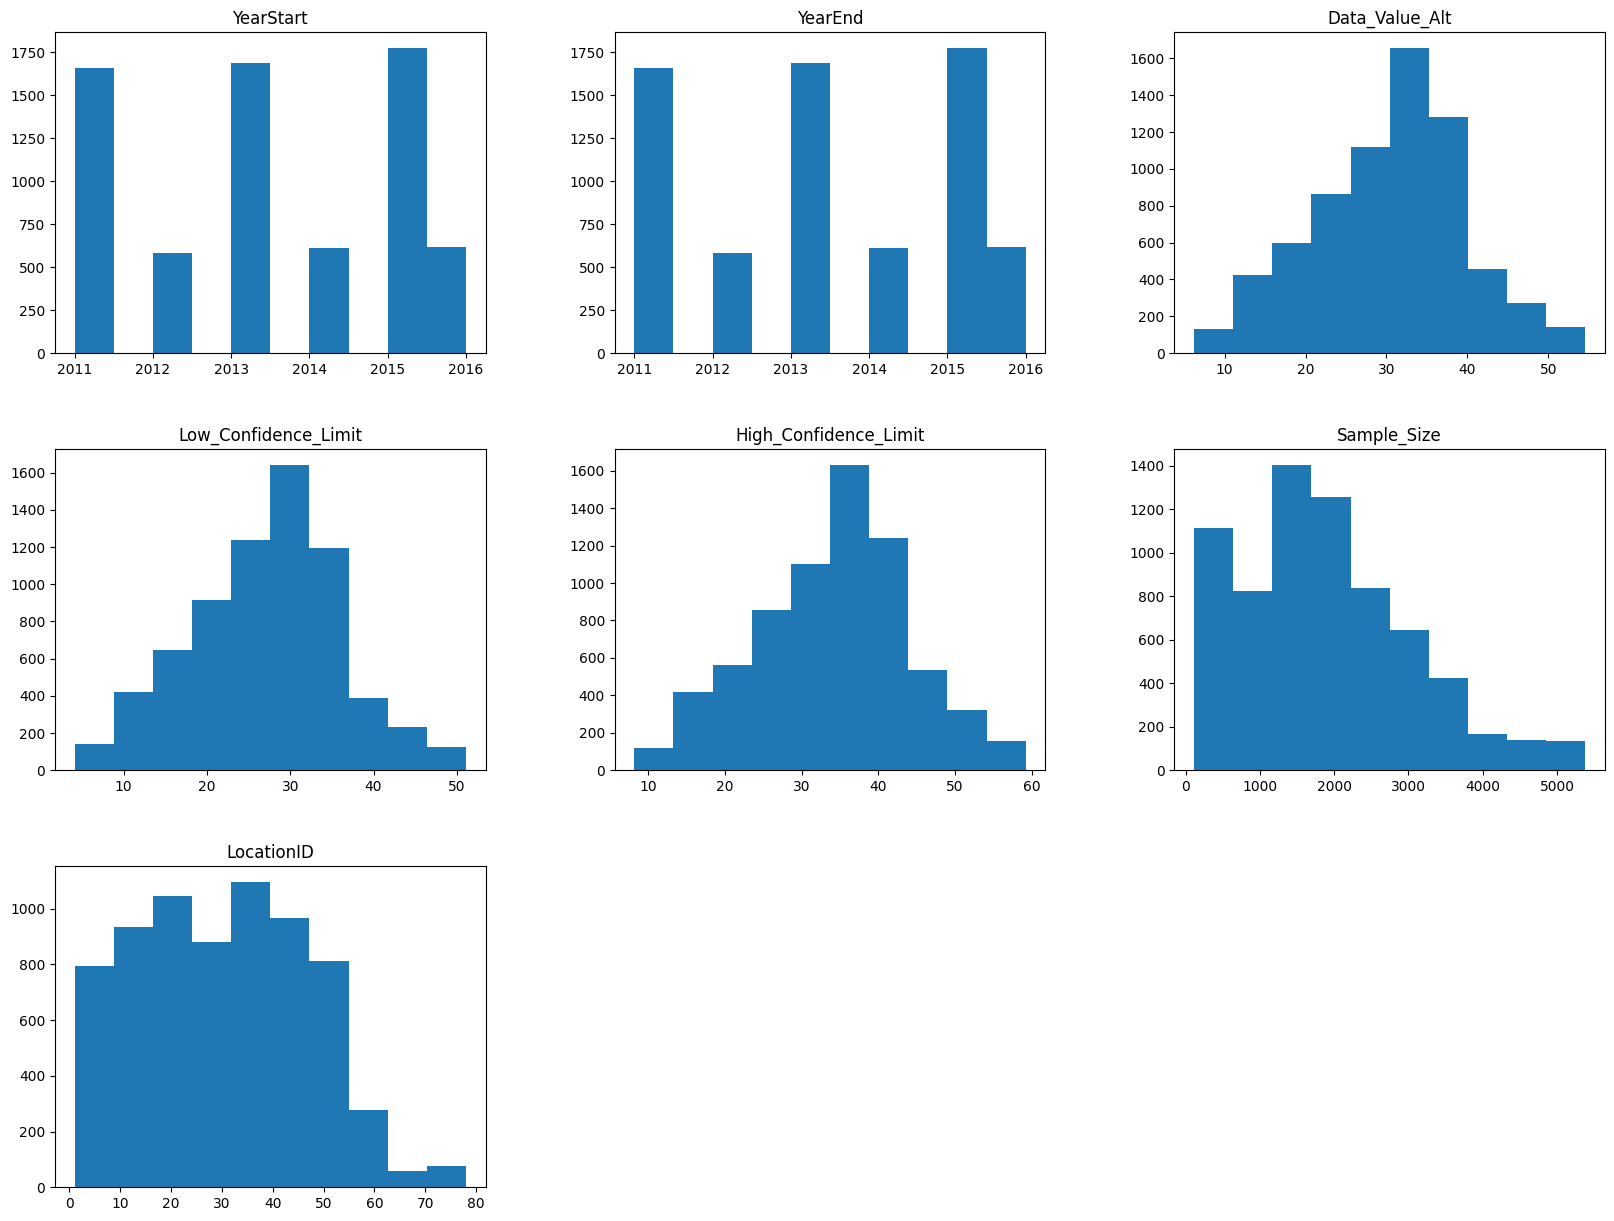

In [37]:
num.hist(figsize=(20,15), grid=False)
plt.show()

### Plot relationships between Numerical variables

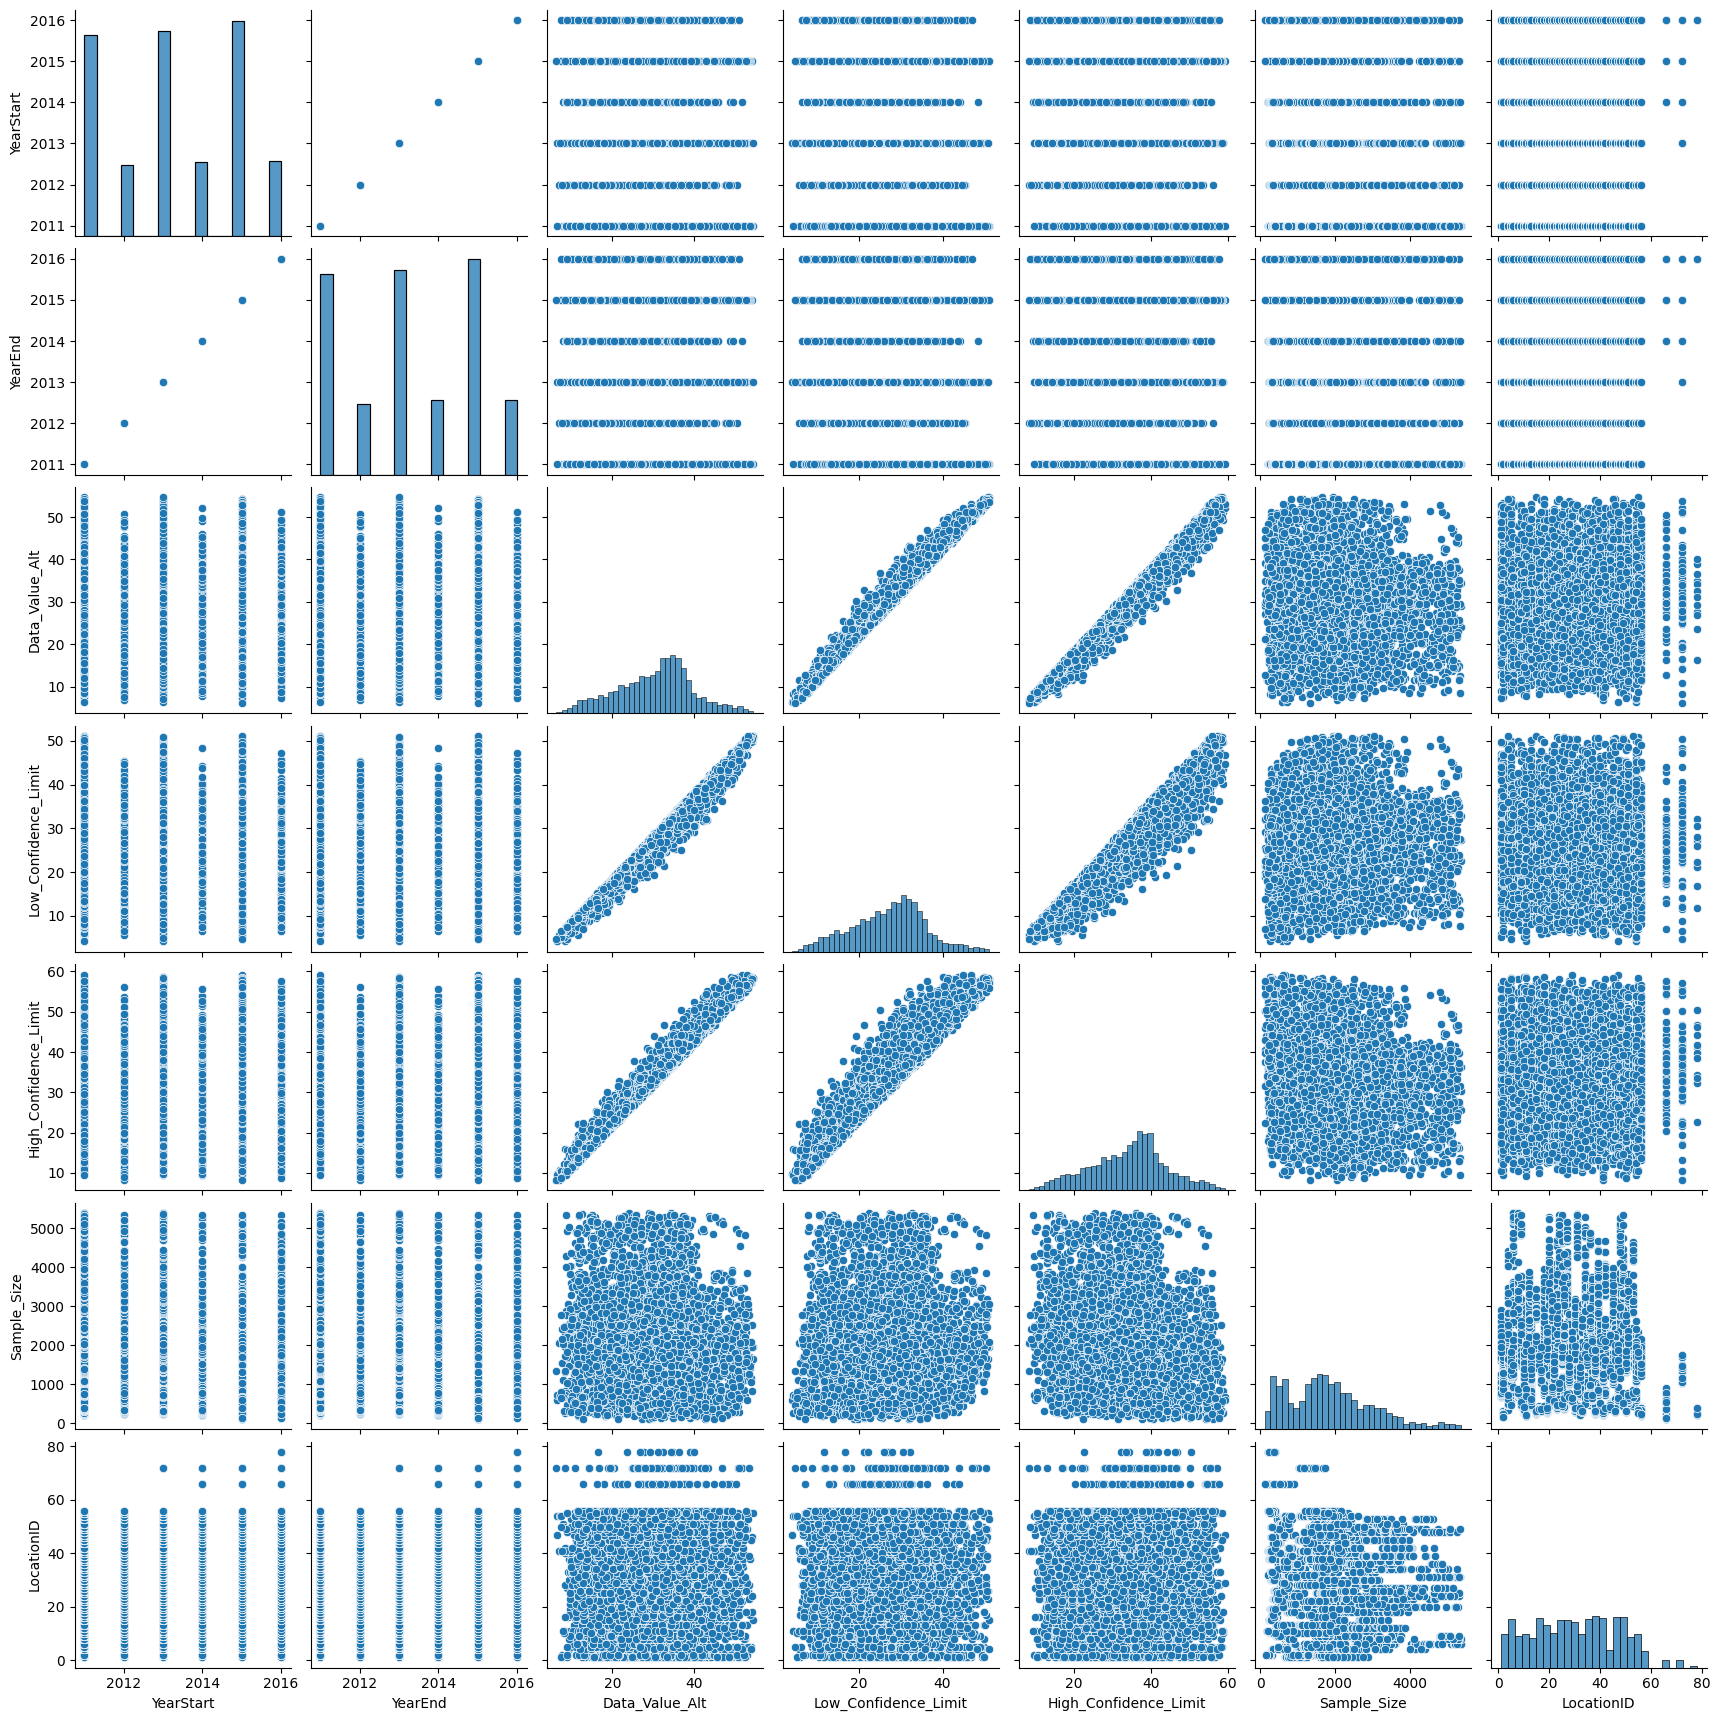

In [38]:
sns.pairplot(num)

In [39]:
num.corr()

,YearStart,YearEnd,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,0.019509,0.009062,0.029935,-0.078040,0.046434
YearEnd,1.000000,1.000000,0.019509,0.009062,0.029935,-0.078040,0.046434
Data_Value_Alt,0.019509,0.019509,1.000000,0.986612,0.984898,-0.124962,-0.000214
Low_Confidence_Limit,0.009062,0.009062,0.986612,1.000000,0.943704,0.002910,0.004402
High_Confidence_Limit,0.029935,0.029935,0.984898,0.943704,1.000000,-0.256214,-0.005112
Sample_Size,-0.078040,-0.078040,-0.124962,0.002910,-0.256214,1.000000,0.013820
LocationID,0.046434,0.046434,-0.000214,0.004402,-0.005112,0.013820,1.000000


In [40]:
num.columns

Index(['YearStart', 'YearEnd', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'LocationID'],
      dtype='object')

In [41]:
n= num[['Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'LocationID']]

<Axes: >

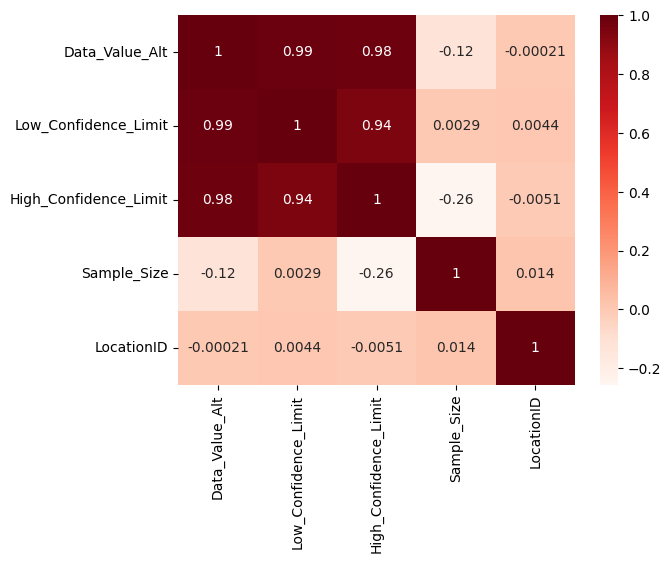

In [42]:
corr = n.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

In [43]:
X = df[['YearStart','Education', 'LocationID']]
y = num['Data_Value_Alt']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,YearStart,Education,LocationID
14967,2011,2,26
46600,2015,1,19
24003,2013,0,38


In [45]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [46]:
X_test_scaled=std_scaler.transform(X_test)

In [47]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.38033768  0.50342707 -0.2404683 ]
 [ 1.01134505 -0.39570848 -0.66584102]
 [-0.18449632 -1.29484403  0.48874207]
 ...
 [ 1.01134505  0.50342707  1.15718492]
 [ 0.41342437 -1.29484403  1.46102257]
 [-0.18449632  0.50342707  1.21795245]]
--------
[[-0.18449632  1.40256262 -1.03044621]
 [-0.782417   -0.39570848  0.30643948]
 [ 0.41342437 -0.39570848  2.55483814]
 ...
 [-1.38033768  0.50342707 -1.21274881]
 [-1.38033768  0.50342707  0.36720701]
 [ 1.01134505 -1.29484403  0.30643948]]


In [48]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()

predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) 

predictions_test = model.predict(X_test_const_scaled) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Data_Value_Alt   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     65.43
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.82e-41
Time:                        14:53:25   Log-Likelihood:                -17674.
No. Observations:                4858   AIC:                         3.536e+04
Df Residuals:                    4854   BIC:                         3.538e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4204      0.132    230.356      0.0

In [49]:
predictions_test

array([27.831358  , 30.97994839, 31.15666981, ..., 29.24800755,
       29.20053708, 33.00180947])

In [50]:
model.rsquared_adj

0.03827150254827483

### model fitting

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
model.coef_

array([ 0.12213778, -1.65544775, -0.00182579])

In [53]:
model.score(X_test_scaled,y_test)

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-709.8894397972846

In [54]:
y_test

7316     15.2
21849    28.2
27055    38.1
32600    43.1
37176    21.4
         ... 
21204    36.3
34761    36.2
4780     37.8
22355    23.6
36923    42.9
Name: Data_Value_Alt, Length: 2082, dtype: float64

In [55]:
y_pred

array([27.831358  , 30.97994839, 31.15666981, ..., 29.24800755,
       29.20053708, 33.00180947])

In [56]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

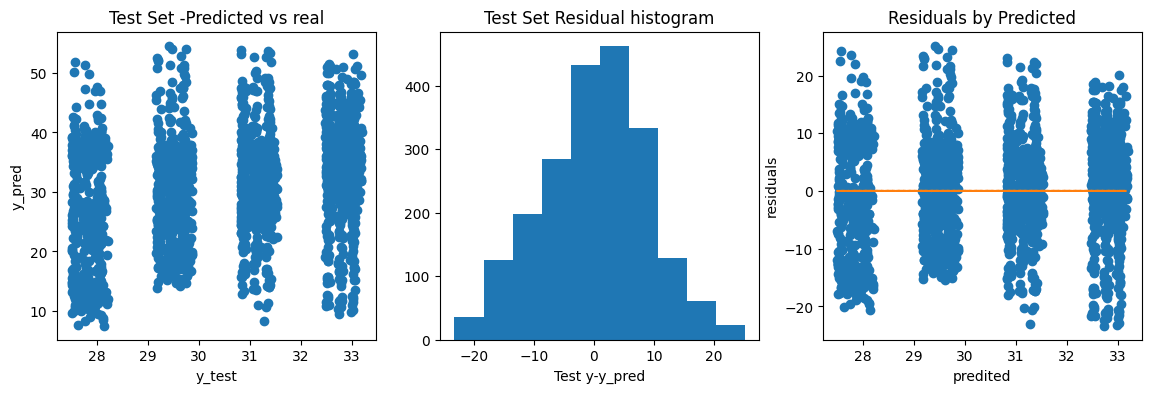

In [57]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: xlabel='y_test', ylabel='y_pred'>

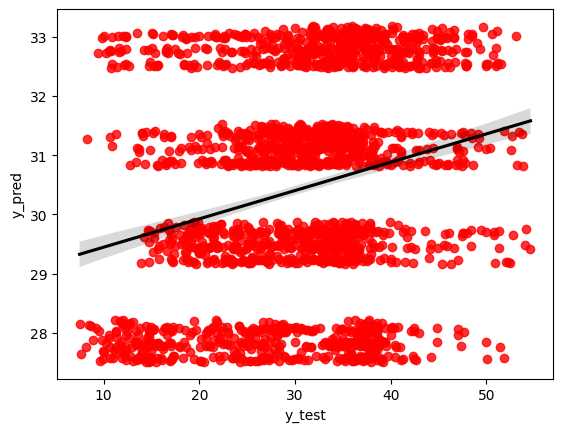

In [58]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Evaluating the model using mean squared error and R-squared


In [59]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 78.83817466174246
R-squared: 0.056188307102694623
Adjusted R-squared: 0.05482573006771296


In [60]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [61]:
features_importances

,Attribute,Importance
1,Education,1.655448
0,YearStart,0.122138
2,LocationID,0.001826


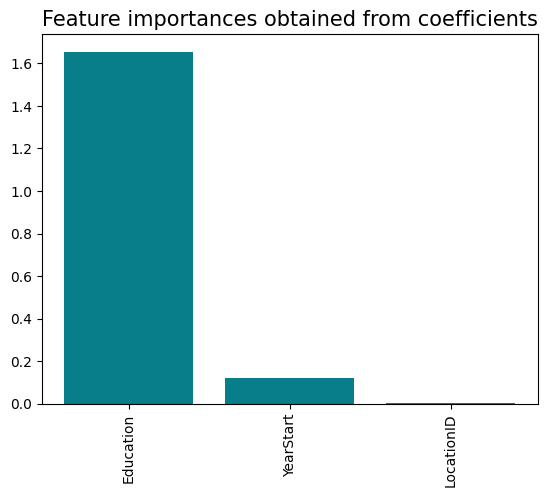

In [62]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

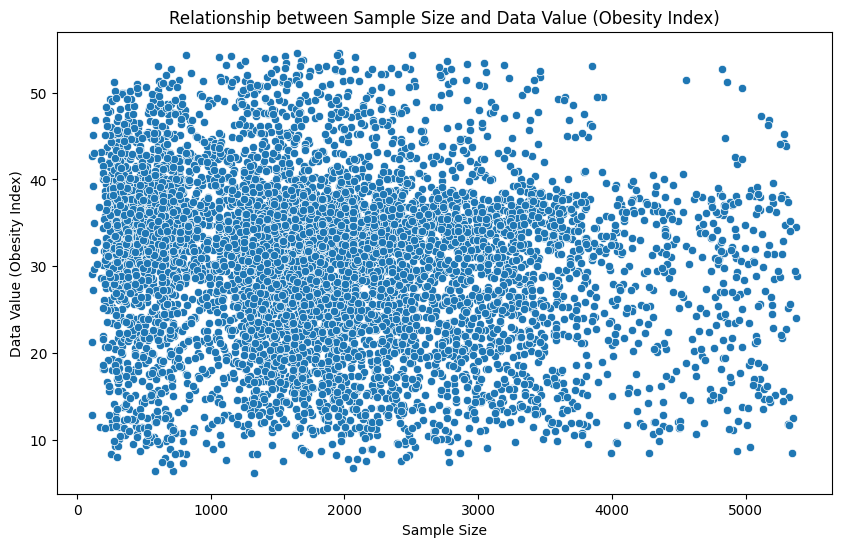

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot( data=df,x='Sample_Size', y='Data_Value_Alt')
plt.title('Relationship between Sample Size and Data Value (Obesity Index)')
plt.xlabel('Sample Size')
plt.ylabel('Data Value (Obesity Index)')
plt.show()